# Astro Project

In [8]:
# Imports and parameter setting

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits


%matplotlib inline
plt.style.use('seaborn-notebook')
width = 3.404
height = width * .9
params = {
    'xtick.labelsize':8,
    'ytick.labelsize':8,
    'axes.labelsize':8,
    'legend.fontsize':8,
    'font.family':'serif',
}
mpl.rcParams.update(params)

In [9]:
# Get data
try:
    hdulist = fits.open('data/m35.fit')
except FileNotFoundError:
    print('Data file missing')

In order to prepare our isochrone data, which is given in absolute visual magnitude and actual color, by correcting for reddening and extinction. For our B-V data, we have from Sung, 99, reddening at 0.255 and a distance modulus of 9.6. We can then find the extinction using
$$
A_V=3.086\cdot E(B-V)
$$
This means we can find the visual magnitude via the following
$$
V_{obs}=M_V + 5 log(D) + 5 + A_V
$$
So you can see that our isochrone can be fit by taking our distance modulus and extinction and adding it to the Mv data. We can correct our B-V using the reddening. For the other color indexes we can correct the color by finding the difference in $A_\lambda$ and $A_V$ which can be written using only $A_V$ using the Johnson-Cousins photometric table. 

In [23]:
data = pd.DataFrame(hdulist[1].data)
isochrone = pd.DataFrame(hdulist[3].data)

ebv = 0.255
Av = 3.086 * ebv
evi = Av * (1 - 0.482)
eub = .024 * (1.531 - 1.324)
print(1.531 - 1.324)
isochrone['V'] = isochrone['Mv']+9.6+Av
isochrone['B-V(cor)'] = isochrone['B-V']+ebv
isochrone['V-I(cor)'] = isochrone['V-Ic']+evi
mask = isochrone['V'] < max(data['Vmag'])

0.20699999999999985


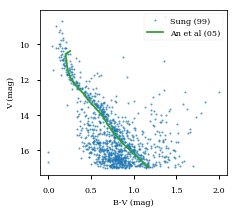

In [14]:
plt.plot('B-V', 'Vmag', 'o', ms=2, data=data, alpha=0.75, label='Sung (99)')
plt.gca().invert_yaxis()
plt.xlabel('B-V (mag)')
plt.ylabel('V (mag)')
plt.legend(loc='best')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/b-v.pdf')

plt.plot(isochrone['B-V(cor)'], isochrone['V'].where(mask), 'C2', label='An et al (05)')
plt.legend(loc='best')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/b-vISO.pdf')

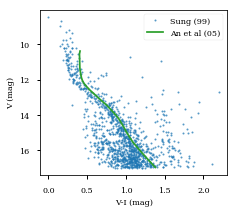

In [20]:
plt.plot('V-I', 'Vmag', 'o', ms=2, data=data, alpha=0.75, label='Sung (99)')
plt.gca().invert_yaxis()
plt.xlabel('V-I (mag)')
plt.ylabel('V (mag)')
plt.legend(loc='best')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/v-i.pdf')


plt.plot(isochrone['V-I(cor)'], isochrone['V'].where(mask), 'C2', label='An et al (05)')
plt.legend(loc='best')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/v-iISO.pdf')

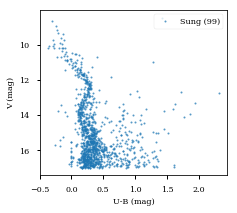

In [13]:
plt.plot('U-B', 'Vmag', 'o', ms=2, data=data, alpha=0.75, label='Sung (99)')
plt.gca().invert_yaxis()
plt.xlabel('U-B (mag)')
plt.ylabel('V (mag)')
plt.legend(loc='best')

plt.gcf().set_size_inches(width, height)
plt.tight_layout()
plt.gcf().savefig('figs/u-b.pdf')

In [7]:
# hdulist.close()